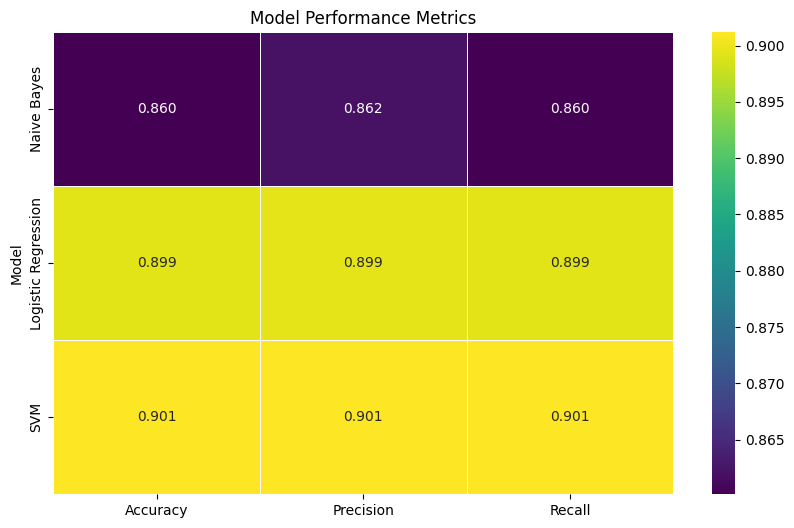

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('/content/IMDB Dataset.csv')


X = data['review']
y = data['sentiment']


tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)


nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


y_pred_nb = nb_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)


accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')


data = {
    'Model': ['Naive Bayes', 'Logistic Regression', 'SVM'],
    'Accuracy': [accuracy_nb, accuracy_lr, accuracy_svm],
    'Precision': [precision_nb, precision_lr, precision_svm],
    'Recall': [recall_nb, recall_lr, recall_svm]
}

results_df = pd.DataFrame(data)


fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(results_df.set_index('Model'), annot=True, cmap='viridis', fmt='.3f', linewidths=.5, ax=ax)
plt.title('Model Performance Metrics')

plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import time


start_time = time.time()
nb_model.fit(X_train, y_train)
training_time_nb = time.time() - start_time


start_time = time.time()
lr_model.fit(X_train, y_train)
training_time_lr = time.time() - start_time


start_time = time.time()
svm_model.fit(X_train, y_train)
training_time_svm = time.time() - start_time


start_time = time.time()
y_pred_nb = nb_model.predict(X_test)
testing_time_nb = time.time() - start_time

start_time = time.time()
y_pred_lr = lr_model.predict(X_test)
testing_time_lr = time.time() - start_time

start_time = time.time()
y_pred_svm = svm_model.predict(X_test)
testing_time_svm = time.time() - start_time

print("Naive Bayes - Training Time:", training_time_nb, "seconds")
print("Naive Bayes - Testing Time:", testing_time_nb, "seconds")

print("Logistic Regression - Training Time:", training_time_lr, "seconds")
print("Logistic Regression - Testing Time:", testing_time_lr, "seconds")

print("SVM - Training Time:", training_time_svm, "seconds")
print("SVM - Testing Time:", testing_time_svm, "seconds")


Naive Bayes - Training Time: 0.3255774974822998 seconds
Naive Bayes - Testing Time: 0.02138519287109375 seconds
Logistic Regression - Training Time: 10.0363028049469 seconds
Logistic Regression - Testing Time: 0.007943153381347656 seconds
SVM - Training Time: 1728.4399871826172 seconds
SVM - Testing Time: 344.07108449935913 seconds


In [ ]:
from sklearn.metrics import classification_report


print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred_nb))


print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))


print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm))


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

    negative       0.83      0.89      0.86      7411
    positive       0.89      0.83      0.86      7589

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      7411
    positive       0.89      0.91      0.90      7589

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000


Classification Report for SVM:
              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      7411
    positive       0.90      0.91      0.90      7589

    accuracy                           0.90     15000
   macro 

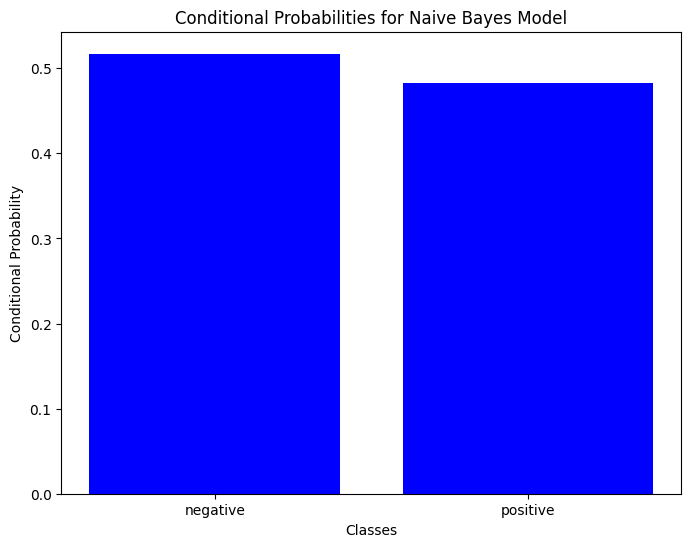

In [ ]:

y_pred_prob_nb = nb_model.predict_proba(X_test)

plt.figure(figsize=(8, 6))
plt.bar(range(len(nb_model.classes_)), y_pred_prob_nb[0], color='blue')
plt.xlabel('Classes')
plt.ylabel('Conditional Probability')
plt.title('Conditional Probabilities for Naive Bayes Model')
plt.xticks(range(len(nb_model.classes_)), nb_model.classes_)
plt.show()

# New Section

In [ ]:
from sklearn import svm

# create an SVM classifier
clf = svm.SVC(kernel='linear')

# train the classifier
clf.fit(X_train, y_train)

# obtain the decision function for a given sample
sample = X_test[0]
decision_value = clf.decision_function(sample.reshape(1, -1))

print("Decision value:", decision_value)


Decision value: [-0.8561628]


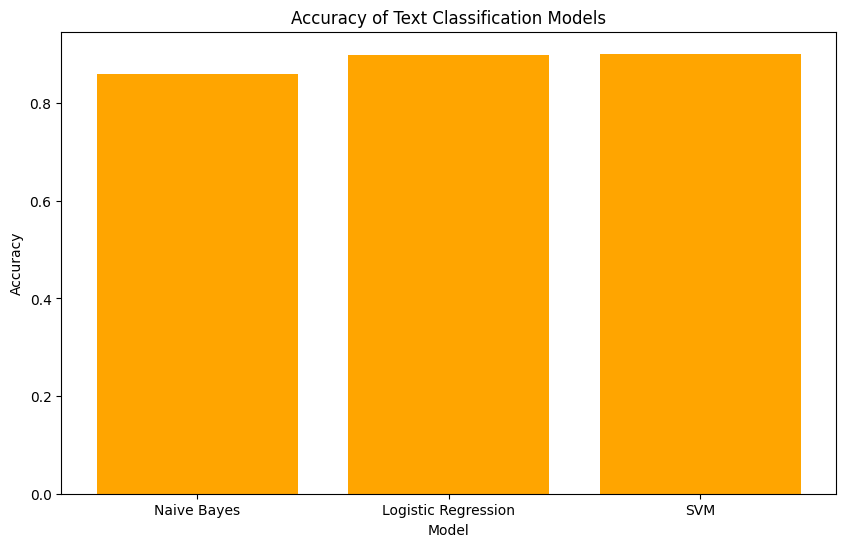

In [ ]:
# Create a bar graph of the accuracy scores
models = ['Naive Bayes', 'Logistic Regression', 'SVM']
accuracies = [accuracy_nb, accuracy_lr, accuracy_svm]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='orange')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Text Classification Models')
plt.show()


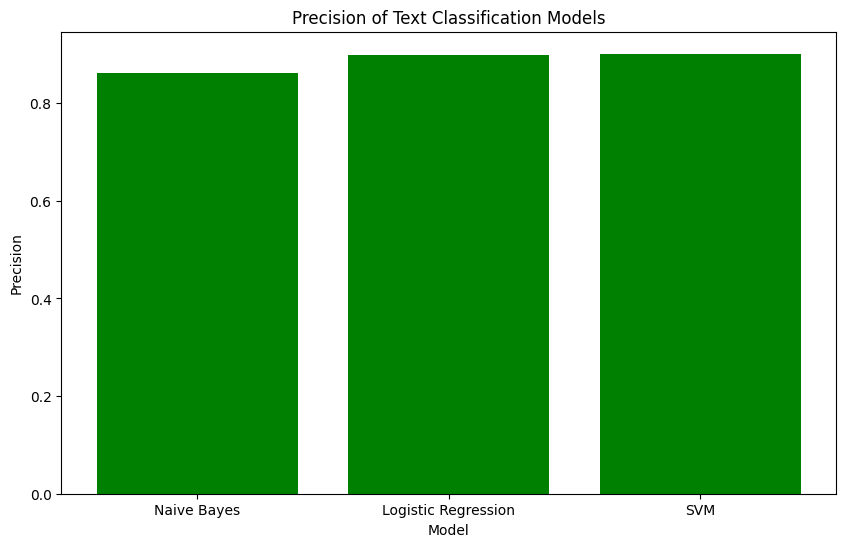

In [ ]:
import matplotlib.pyplot as plt

models = ['Naive Bayes', 'Logistic Regression', 'SVM']
precisions = [precision_nb, precision_lr, precision_svm]

plt.figure(figsize=(10, 6))
plt.bar(models, precisions, color='green')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision of Text Classification Models')
plt.show()


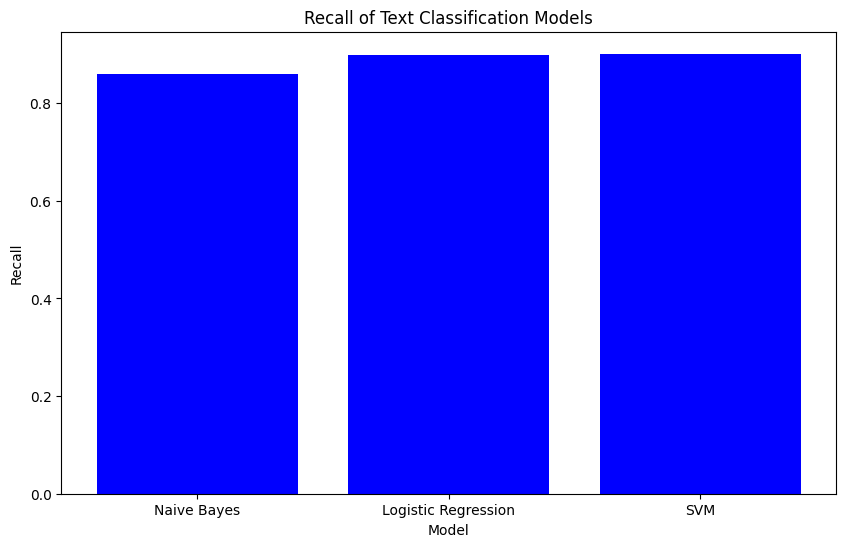

In [ ]:
import matplotlib.pyplot as plt

models = ['Naive Bayes', 'Logistic Regression', 'SVM']
recalls = [recall_nb, recall_lr, recall_svm]

plt.figure(figsize=(10, 6))
plt.bar(models, recalls, color='blue')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall of Text Classification Models')
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Step 1: Read the CSV file in chunks
chunk_size = 1000  # Adjust the chunk size as needed
data_chunks = pd.read_csv('/content/IMDB Dataset.csv', chunksize=chunk_size)

# Step 2: Initialize CountVectorizer and TfidfTransformer
count_vectorizer = CountVectorizer()
tfidf_transformer = TfidfTransformer()

# Step 3: Process data in chunks
for chunk in data_chunks:
    documents = chunk["review"].tolist()

    # Step 4: Create Count Vectorizer and TF-IDF Matrix
    X_counts = count_vectorizer.fit_transform(documents)
    X_tfidf = tfidf_transformer.fit_transform(X_counts)

    # Step 5: Print TF-IDF Matrix or perform other operations

    # Example: Print the first row of TF-IDF Matrix
    print(pd.DataFrame(X_tfidf[0].toarray(), columns=count_vectorizer.get_feature_names_out()))

# Repeat Step 5 as needed for further processing


    00  000  007  00am  01pm   08   10  100  1000  100th  ...  zooming  zooms  \
0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0    0.0  ...      0.0    0.0   

    zp   zu  zucker  zulu  zwick  zzzzzzzzzzzzzzzzzz  élan  ísnt  
0  0.0  0.0     0.0   0.0    0.0                 0.0   0.0   0.0  

[1 rows x 17922 columns]
   000  007   02   04   06   07       10  100  1000  100th  ...   zu  zuber  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.07171  0.0   0.0    0.0  ...  0.0    0.0   

   zues  zwart  álvaro  ángel  æon  être   ís  île  
0   0.0    0.0     0.0    0.0  0.0   0.0  0.0  0.0  

[1 rows x 17524 columns]
    00       000  007   02   05   08   09   10  100  1000  ...  zorro   zu  \
0  0.0  0.057655  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0  0.0   

   zubeidaa  zucco  zucker  zudina  zues  zulu  zurich  émigrés  
0       0.0    0.0     0.0     0.0   0.0   0.0     0.0      0.0  

[1 rows x 18351 columns]
    00       000  007   01   07   09        10  100  1000  100th  ...  

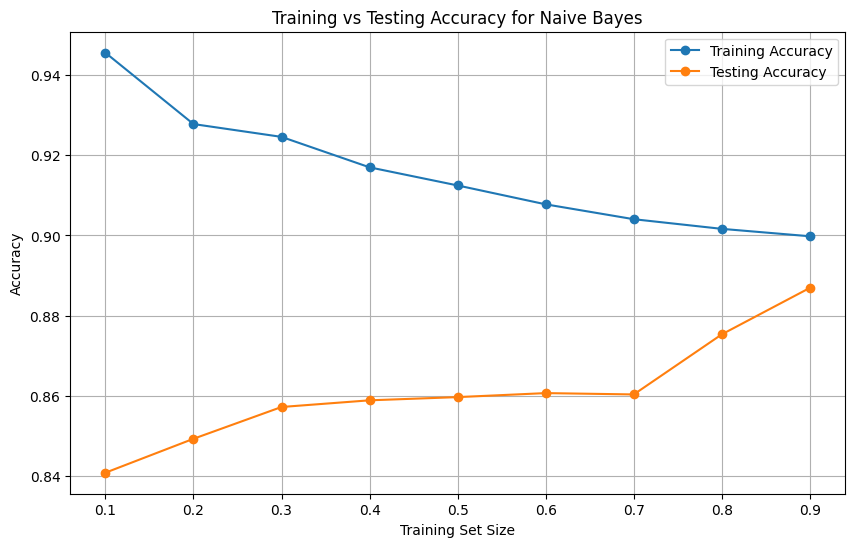

In [ ]:
import numpy as np

# Define a range of training set sizes
training_sizes = np.linspace(0.1, 0.9, 9)  # Adjust the range as needed

train_accuracies = []
test_accuracies = []

# Iterate over different training set sizes
for size in training_sizes:
    # Split the data into training and testing sets
    X_train_subset, _, y_train_subset, _ = train_test_split(X_tfidf, y, train_size=size, random_state=42)

    # Train the Naive Bayes model
    nb_model.fit(X_train_subset, y_train_subset)

    # Calculate training accuracy
    train_accuracy = nb_model.score(X_train_subset, y_train_subset)
    train_accuracies.append(train_accuracy)

    # Calculate testing accuracy
    test_accuracy = nb_model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plot the training vs testing accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(training_sizes, test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy for Naive Bayes')
plt.legend()
plt.grid(True)
plt.show()


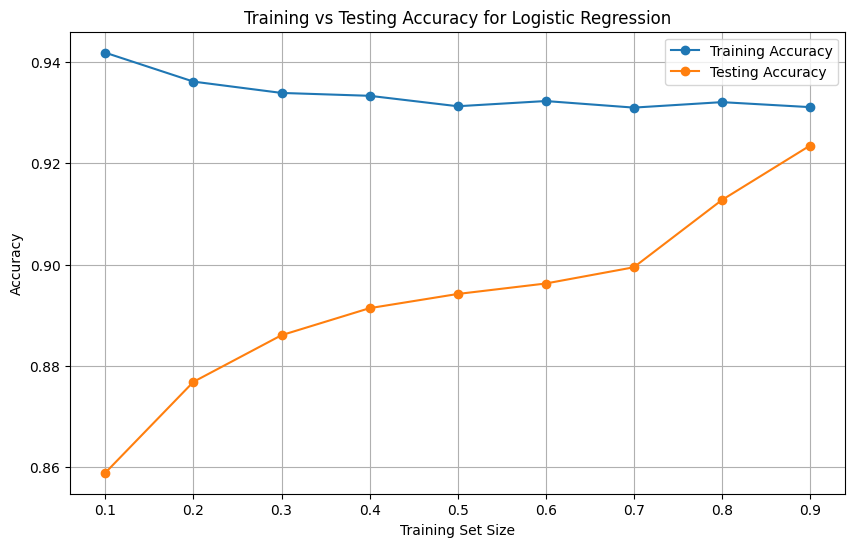

In [ ]:
import numpy as np

# Define a range of training set sizes
training_sizes = np.linspace(0.1, 0.9, 9)  # Adjust the range as needed

train_accuracies = []
test_accuracies = []

# Iterate over different training set sizes
for size in training_sizes:
    # Split the data into training and testing sets
    X_train_subset, _, y_train_subset, _ = train_test_split(X_tfidf, y, train_size=size, random_state=42)

    # Train the Logistic Regression model
    lr_model.fit(X_train_subset, y_train_subset)

    # Calculate training accuracy
    train_accuracy = lr_model.score(X_train_subset, y_train_subset)
    train_accuracies.append(train_accuracy)

    # Calculate testing accuracy
    test_accuracy = lr_model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plot the training vs testing accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(training_sizes, test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


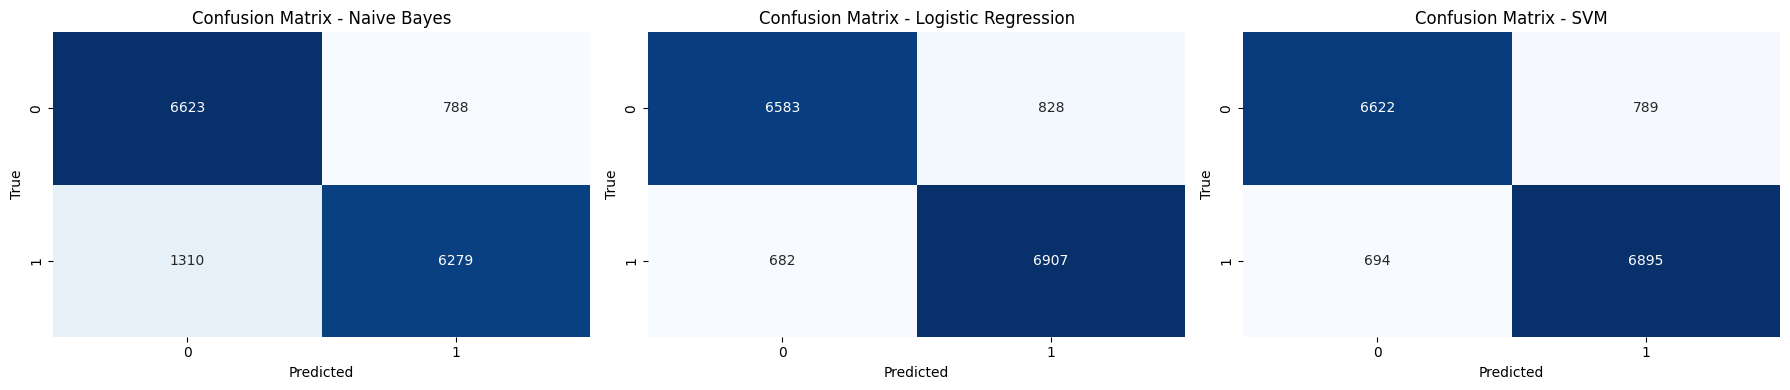

In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

# Calculate confusion matrix for each model
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix for each model
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 3, 2)
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 3, 3)
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()
